In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("E:\Technolabs\cleaned_final.csv")

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [5]:
# Let's import the required packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
lr = LogisticRegression()

In [7]:
# Let's split the data into train test
X_train,X_test,y_train,y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1),df['default payment next month'].values,test_size=0.2,random_state=24)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [9]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Let's predict on test set
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7834239639977498

#### Array of Predicted Probs

In [12]:
# Obtaining a predicted probabilities from test set
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

#### The ROC curve

In [13]:
pos_prob = y_pred_prob[:,1]

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pos_prob)

Text(0.5, 1.0, 'ROC curve')

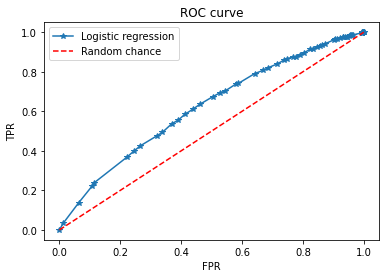

In [15]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

#### Let's calculate the  ROC_AUC curve

In [16]:
metrics.roc_auc_score(y_test,pos_prob)

0.6201990844642832

Comparing the roc_auc score of a 'LIMIT_BAL' feature with 'EDUCATION'  feature, we can see that we got good score for limit_bal 

In [17]:
# Let's calculate the precision-recall-curve
precision,recall,thresholds = metrics.precision_recall_curve(y_test,pos_prob)

In [18]:
metrics.precision_recall_curve(y_test,pos_prob)

(array([0.21661665, 0.21651032, 0.21663225, 0.21667293, 0.21671362,
        0.21687653, 0.21695807, 0.21712135, 0.21724398, 0.21728488,
        0.2173258 , 0.21715363, 0.21719457, 0.21704695, 0.21716981,
        0.21725179, 0.22033243, 0.22073643, 0.22129396, 0.22189753,
        0.22198318, 0.22200354, 0.22244133, 0.22283792, 0.22392516,
        0.22441652, 0.22553363, 0.22670997, 0.22714286, 0.22761729,
        0.22985832, 0.2305063 , 0.23116659, 0.231755  , 0.23327465,
        0.23466667, 0.23569638, 0.23654424, 0.23784926, 0.23956357,
        0.24237288, 0.24342913, 0.24518744, 0.24855794, 0.25020134,
        0.25417595, 0.25845411, 0.26031164, 0.26293661, 0.26655574,
        0.27004512, 0.27573253, 0.27804107, 0.28183716, 0.28231142,
        0.28683603, 0.28744327, 0.29115934, 0.30654206, 0.31032172,
        0.31477357, 0.36617843, 0.36338028, 0.37470726, 0.42857143,
        1.        ]),
 array([1.        , 0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 ,
        0.9991342 , 0.9991

In [19]:
# Let's visualize the data 

(0.0, 1.0)

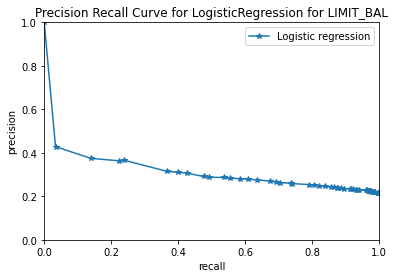

In [20]:
plt.plot(recall, precision, '*-')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve for LogisticRegression for LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])

##### Calculating area under the curve(auc) for precision-recall curve

In [21]:
metrics.auc(recall,precision)

0.31566964427378624

###### Recalculating the ROC-AUC curve for training dataset


In [22]:
# First we need to calculate y_train_pred_proba
y_train_prob = lr.predict_proba(X_train)

In [23]:
pos_train_prob = y_train_prob[:,1]

In [24]:
#ROC_AUC
metrics.roc_auc_score(y_train,pos_train_prob)

0.6182918113358344

##### When we compare the scores of roc_auc of both train,test datset ,we see there is a no difference b/w them ,almost similar 